<a href="https://colab.research.google.com/github/EmirKeremYilmaz/DSA-210-PROJECT/blob/main/mainsource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So first,in these code blocks, my aim is to investigate my exam periods.In these exam periods, what is my eating preferances and how my sleep schedule changes?By looking at these ı want to state the hypothesis to start this investigation:

My hypothesis is that during exam periods, my eating habits change in a bad way, i consume more calories and junk food meals and my sleep duration and quality decreases.

Firstly,I read the data from corresponding files for searching my eating and sleeping data.

In [ ]:
from google.colab import files

# Upload files from your local machine
uploaded = files.upload()


Saving extended_eating_data_final.csv to extended_eating_data_final.csv
Saving extended_sleep_data_final_full.csv to extended_sleep_data_final_full.csv


In [ ]:
import os

# Check the files in the current directory
print(os.listdir())


['.config', 'extended_eating_data_final.csv', 'sorted_combined_sleep_data.csv', 'extended_sleep_data_final_full.csv', 'sorted_combined_eating_data.csv', 'sample_data']


Then, i selected a exam and non-exam period to track my data; also i selected random period that i had not have an exam.

In [ ]:
import pandas as pd
import random

# Load the extended data files
eating_exam = pd.read_csv('extended_eating_data_final.csv')
sleep_exam = pd.read_csv('extended_sleep_data_final_full.csv')

# Convert 'Date' columns to datetime format
eating_exam['Date'] = pd.to_datetime(eating_exam['Date'])
sleep_exam['Date'] = pd.to_datetime(sleep_exam['Date'])

# Define the exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Strip time, keep only date
eating_exam['Date'] = eating_exam['Date'].dt.date
sleep_exam['Date'] = sleep_exam['Date'].dt.date

# Label Exam and Non-Exam Periods
eating_exam['Period'] = eating_exam['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)
sleep_exam['Period'] = sleep_exam['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)

# Get exam length
exam_dates = sorted(eating_exam[eating_exam['Period'] == 'Exam']['Date'].unique())
exam_day_count = len(exam_dates)

# Get all non-exam dates
non_exam_dates = sorted(eating_exam[eating_exam['Period'] == 'Non-Exam']['Date'].unique())
latest_start = non_exam_dates[-exam_day_count]
valid_start_dates = [d for d in non_exam_dates if d <= latest_start]

# Pick random valid window
random_start_date = random.choice(valid_start_dates)
random_end_date = random_start_date + pd.Timedelta(days=exam_day_count - 1)

# Assign Adjusted Period
eating_exam['Adjusted Period'] = eating_exam['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else (
        'Non-Exam' if random_start_date <= x <= random_end_date else 'Exclude')
)
sleep_exam['Adjusted Period'] = sleep_exam['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else (
        'Non-Exam' if random_start_date <= x <= random_end_date else 'Exclude')
)

# Print counts
print("📊 Adjusted Period Counts for Eating Data:")
print(eating_exam['Adjusted Period'].value_counts())

print("\n📊 Adjusted Period Counts for Sleep Data:")
print(sleep_exam['Adjusted Period'].value_counts())

# Print selected Non-Exam date range
print(f"\n📅 Randomly selected Non-Exam Period: {random_start_date} to {random_end_date}")

# Filter Exam and Non-Exam only
eating_exam_filtered = eating_exam[eating_exam['Adjusted Period'].isin(['Exam', 'Non-Exam'])]
sleep_exam_filtered = sleep_exam[sleep_exam['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Show sample output
print("\n🧾 Filtered Eating Data:")
print(eating_exam_filtered.head())

print("\n🧾 Filtered Sleep Data:")
print(sleep_exam_filtered.head())

📊 Adjusted Period Counts for Eating Data:
Adjusted Period
Non-Exam    36
Exam        33
Exclude     26
Name: count, dtype: int64

📊 Adjusted Period Counts for Sleep Data:
Adjusted Period
Exam        33
Non-Exam    32
Exclude     30
Name: count, dtype: int64

📅 Randomly selected Non-Exam Period: 2025-02-18 to 2025-03-21

🧾 Filtered Eating Data:
          Date  Meal_Count  Healthy_Meals  Junk_Meals  Calories  Protein (g)  \
21  2025-02-18           6              5           1      1954          135   
22  2025-02-19           6              5           1      2067          147   
23  2025-02-20           4              4           0      2128          147   
24  2025-02-21           5              5           0      2181          159   
25  2025-02-22           6              5           1      1803          141   

    Carbs (g)  Caffeine_Intake (mg)    Period Adjusted Period  
21        256                    97  Non-Exam        Non-Exam  
22        230                   109  Non-Exam

For start,ı begun with with my eating data.I created a line graph to visualize that how many meal ı ate daily for exam period vs non exam period.By just looking at this visualization, it seems there might have shifts for eating more in non-exam period but we have to be sure since there are multiple points i ate more in exam period. More tests need to be done.

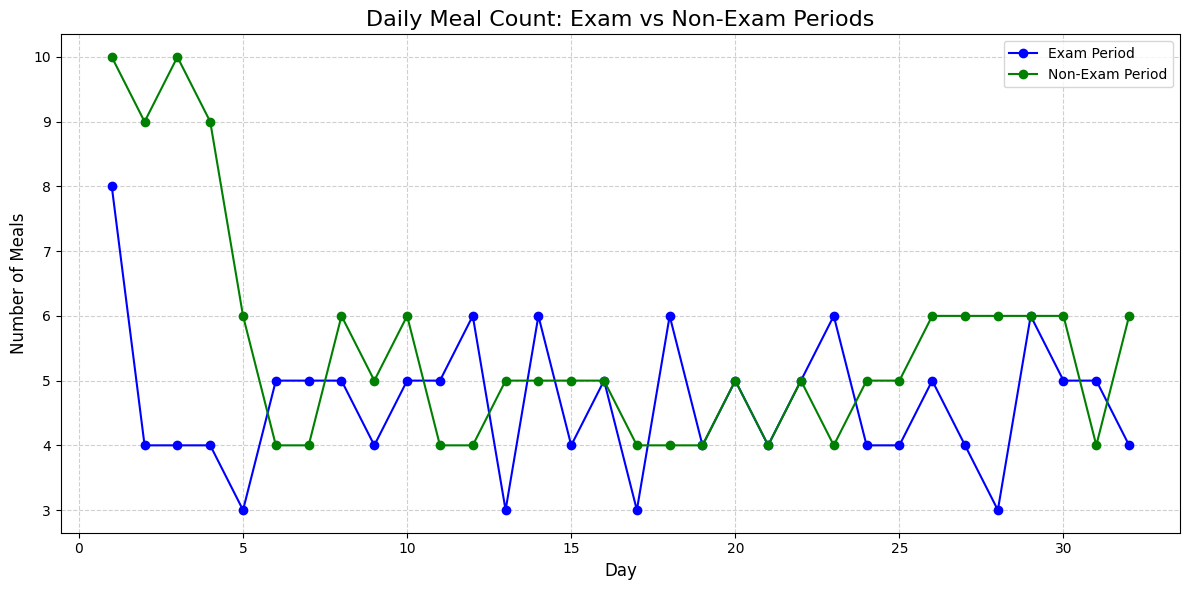

📅 Exam Period: 2025-03-27 → 2025-04-27 (32 days)
📅 Non-Exam Sample: 2025-02-23 → 2025-03-26 (32 days)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the extended eating data
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Mark periods
eating_df['Period'] = eating_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Match exam day count
exam_day_count = len(eating_df[(eating_df['Period'] == 'Exam')]['Date'].unique())
non_exam_dates = sorted(eating_df[eating_df['Period'] == 'Non-Exam']['Date'].unique())
latest_start = non_exam_dates[-exam_day_count]
valid_start_dates = [d for d in non_exam_dates if d <= latest_start]
random_start = pd.to_datetime(random.choice(valid_start_dates)).date()
random_end = random_start + pd.Timedelta(days=exam_day_count - 1)

# Assign Adjusted Period
eating_df['Adjusted Period'] = eating_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else (
        'Non-Exam' if random_start <= x <= random_end else 'Exclude')
)

# Filter only relevant data
filtered_df = eating_df[eating_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Aggregate by day
daily_meals = filtered_df.groupby(['Date', 'Adjusted Period'])['Meal_Count'].sum().reset_index()

# Split exam and non-exam
exam_meals = daily_meals[daily_meals['Adjusted Period'] == 'Exam'].sort_values('Date').copy()
non_exam_meals = daily_meals[daily_meals['Adjusted Period'] == 'Non-Exam'].sort_values('Date').copy()

# Create day index
exam_meals['Day'] = range(1, len(exam_meals) + 1)
non_exam_meals['Day'] = range(1, len(non_exam_meals) + 1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(exam_meals['Day'], exam_meals['Meal_Count'], marker='o', linestyle='-', color='blue', label='Exam Period')
plt.plot(non_exam_meals['Day'], non_exam_meals['Meal_Count'], marker='o', linestyle='-', color='green', label='Non-Exam Period')
plt.title('Daily Meal Count: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Meals', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: Print sample range info
print(f"📅 Exam Period: {exam_start} → {exam_end} ({exam_day_count} days)")
print(f"📅 Non-Exam Sample: {random_start} → {random_end} ({exam_day_count} days)")

For addition, i created a boxplot to see the difference in variances for both period.

<ipython-input-21-17d36140b519>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Adjusted Period', y='Meal_Count', data=daily_meals, palette='coolwarm')


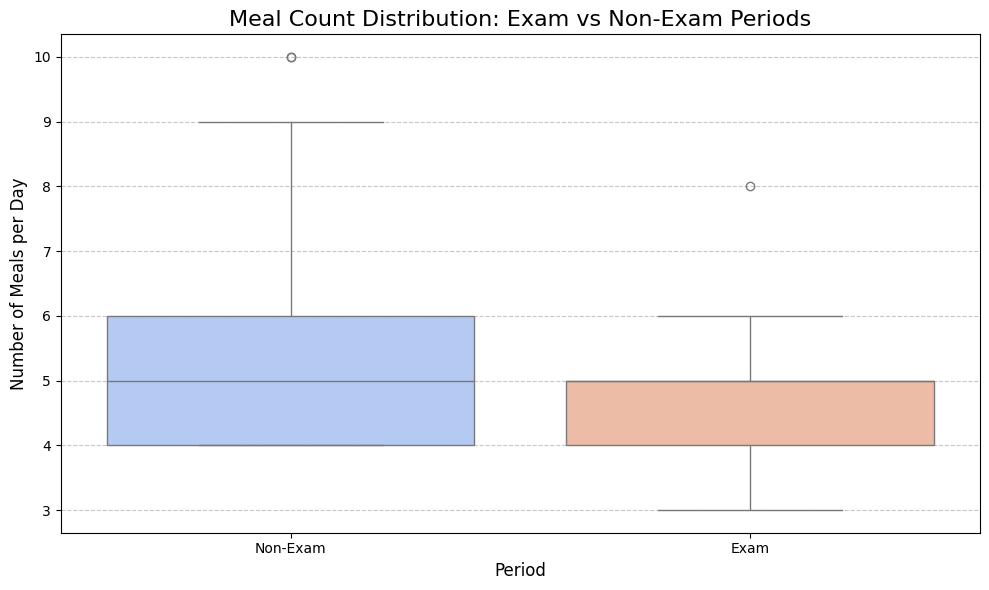

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load your eating dataset
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Label exam vs non-exam
eating_df['Period'] = eating_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Match sample size
exam_day_count = len(eating_df[eating_df['Period'] == 'Exam']['Date'].unique())
non_exam_dates = sorted(eating_df[eating_df['Period'] == 'Non-Exam']['Date'].unique())
latest_start = non_exam_dates[-exam_day_count]
valid_starts = [d for d in non_exam_dates if d <= latest_start]
random_start = random.choice(valid_starts)
random_end = random_start + pd.Timedelta(days=exam_day_count - 1)

# Assign Adjusted Period
eating_df['Adjusted Period'] = eating_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if random_start <= x <= random_end else 'Exclude')
)

# Filter
filtered_df = eating_df[eating_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Group by day and aggregate meal counts
daily_meals = filtered_df.groupby(['Date', 'Adjusted Period'])['Meal_Count'].sum().reset_index()

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Adjusted Period', y='Meal_Count', data=daily_meals, palette='coolwarm')
plt.title('Meal Count Distribution: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Number of Meals per Day', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Then, i wonder that what were these meals? In other words, did i consume more junk food when i had an exam or my health focused consumer behavior continued? Does this trend change when i swtiched it to non-exam period?



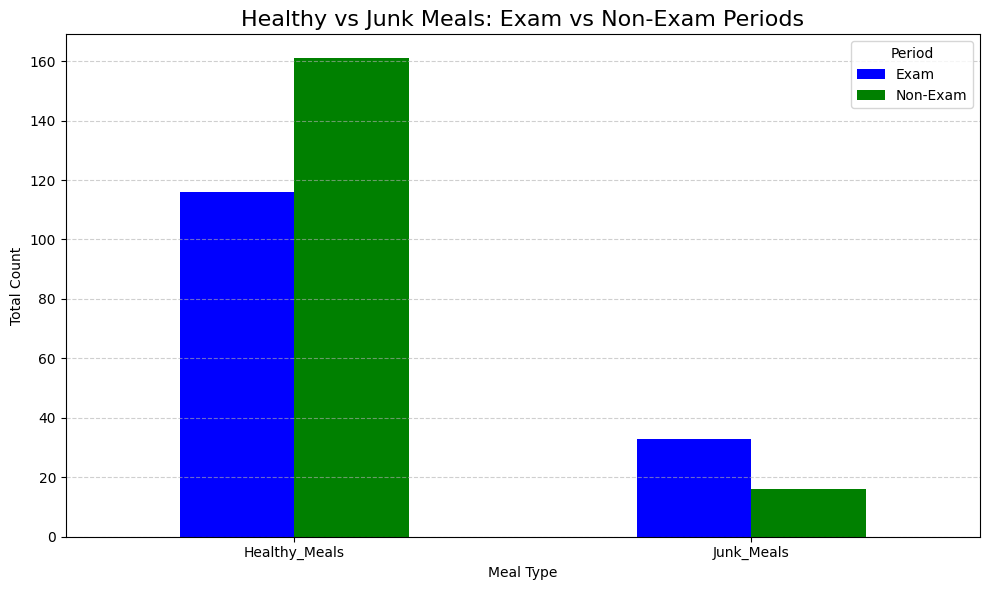

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load dataset
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Label periods
eating_df['Period'] = eating_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Match day count
exam_day_count = len(eating_df[eating_df['Period'] == 'Exam']['Date'].unique())
non_exam_dates = sorted(eating_df[eating_df['Period'] == 'Non-Exam']['Date'].unique())
latest_start = non_exam_dates[-exam_day_count]
valid_starts = [d for d in non_exam_dates if d <= latest_start]
random_start = random.choice(valid_starts)
random_end = random_start + pd.Timedelta(days=exam_day_count - 1)

# Adjusted Period
eating_df['Adjusted Period'] = eating_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else (
        'Non-Exam' if random_start <= x <= random_end else 'Exclude')
)

# Filter for Exam and Non-Exam
filtered_df = eating_df[eating_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Aggregate healthy and junk meals
meal_type_totals = filtered_df.groupby('Adjusted Period')[['Healthy_Meals', 'Junk_Meals']].sum().T

# Plot
meal_type_totals.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Healthy vs Junk Meals: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Meal Type')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

For better understanding the meals i ate,ı created the pie-chart which shows to meal type distribution that ı ate in exam period.

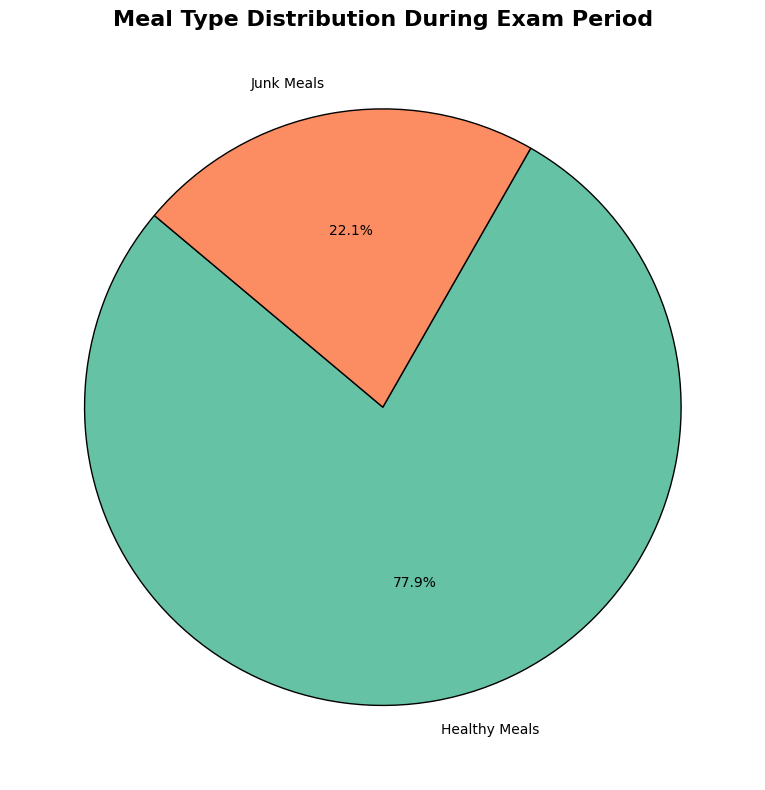

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the extended eating data
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Filter for exam period only
exam_data = eating_df[(eating_df['Date'] >= exam_start) & (eating_df['Date'] <= exam_end)]

# Sum healthy and junk meals
healthy_total = exam_data['Healthy_Meals'].sum()
junk_total = exam_data['Junk_Meals'].sum()

# Create pie chart data
meal_labels = ['Healthy Meals', 'Junk Meals']
meal_sizes = [healthy_total, junk_total]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    meal_sizes,
    labels=meal_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Meal Type Distribution During Exam Period', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Then, i did the same thing for my non-exam period to see the differences in distribution.

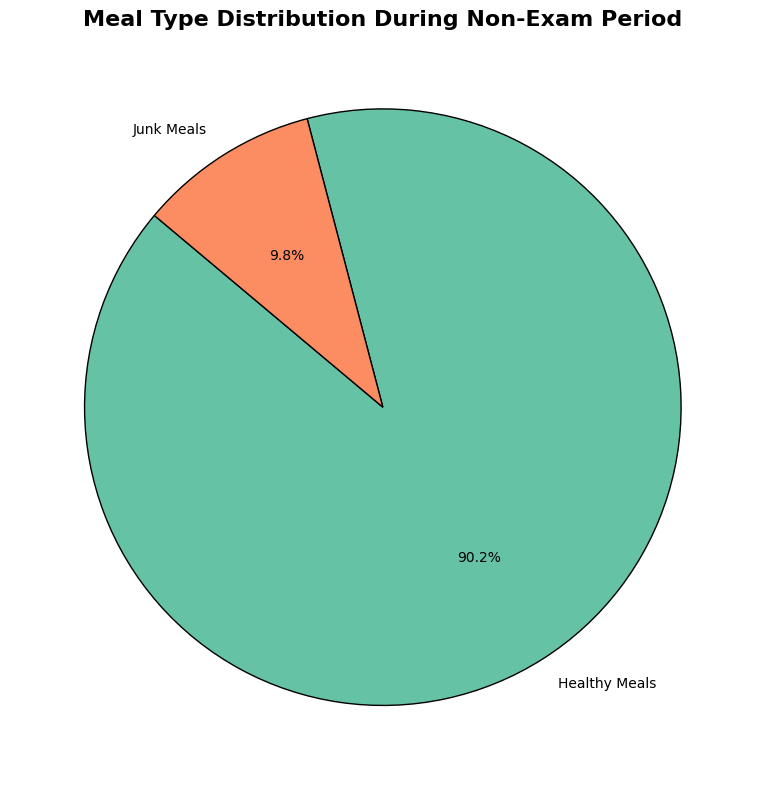

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the extended eating data
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period (FIXED)
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()  # ← fixed line

# Filter for non-exam period (outside the exam range)
non_exam_data = eating_df[(eating_df['Date'] < exam_start) | (eating_df['Date'] > exam_end)]

# Sum healthy and junk meals
healthy_total = non_exam_data['Healthy_Meals'].sum()
junk_total = non_exam_data['Junk_Meals'].sum()

# Prepare pie chart data
meal_labels = ['Healthy Meals', 'Junk Meals']
meal_sizes = [healthy_total, junk_total]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    meal_sizes,
    labels=meal_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Meal Type Distribution During Non-Exam Period', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Then, i wanted to check the ingredient distributions of the meals i ate in the exam period. I focused on protein and carbs which are the main indredient types that i care.

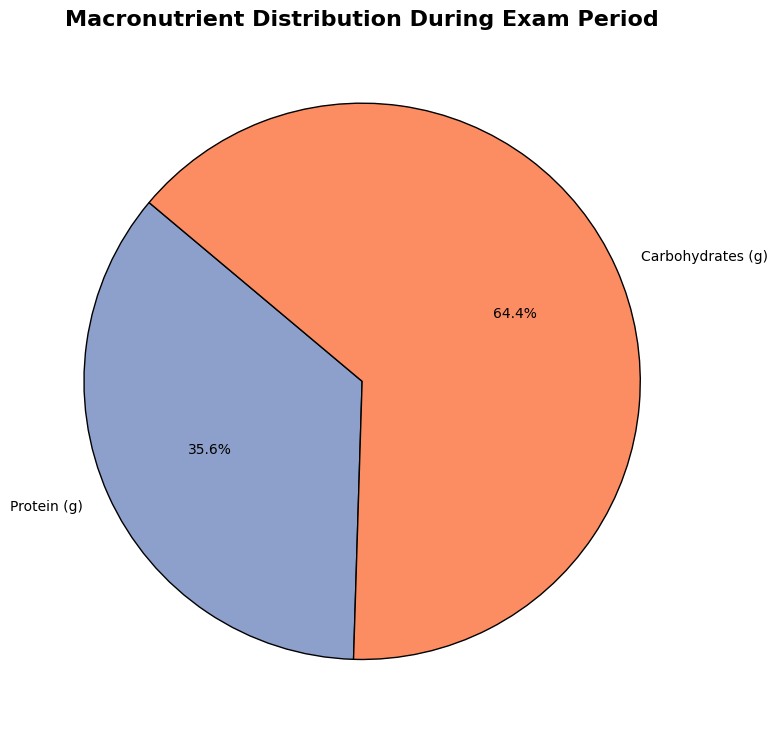

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Filter exam period data
exam_data = eating_df[(eating_df['Date'] >= exam_start) & (eating_df['Date'] <= exam_end)]

# Sum protein and carbohydrate intake
total_protein = exam_data['Protein (g)'].sum()
total_carbs = exam_data['Carbs (g)'].sum()

# Prepare data for pie chart
labels = ['Protein (g)', 'Carbohydrates (g)']
values = [total_protein, total_carbs]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#8da0cb', '#fc8d62'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Macronutrient Distribution During Exam Period', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Then, i did the same think for non-exam period to see if there are differences in protein and carb distribution.

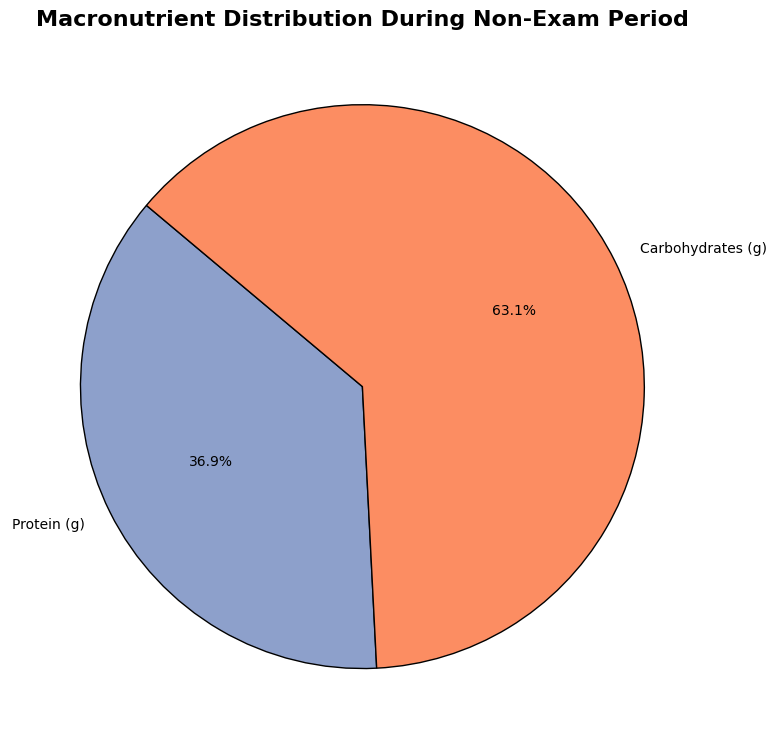

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the eating data
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Filter non-exam period data
non_exam_data = eating_df[(eating_df['Date'] < exam_start) | (eating_df['Date'] > exam_end)]

# Sum protein and carbohydrate intake
total_protein = non_exam_data['Protein (g)'].sum()
total_carbs = non_exam_data['Carbs (g)'].sum()

# Prepare data for pie chart
labels = ['Protein (g)', 'Carbohydrates (g)']
values = [total_protein, total_carbs]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#8da0cb', '#fc8d62'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Macronutrient Distribution During Non-Exam Period', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

After checking ingredient distributions for both period, i focused on the calorie intake which is very important for me to understand if there is a change in eating behaviour in general. So, i created a boxplot to visualize the situation for both period.

<ipython-input-30-eb681c14c890>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Calories', data=daily_calories, palette='Set2')


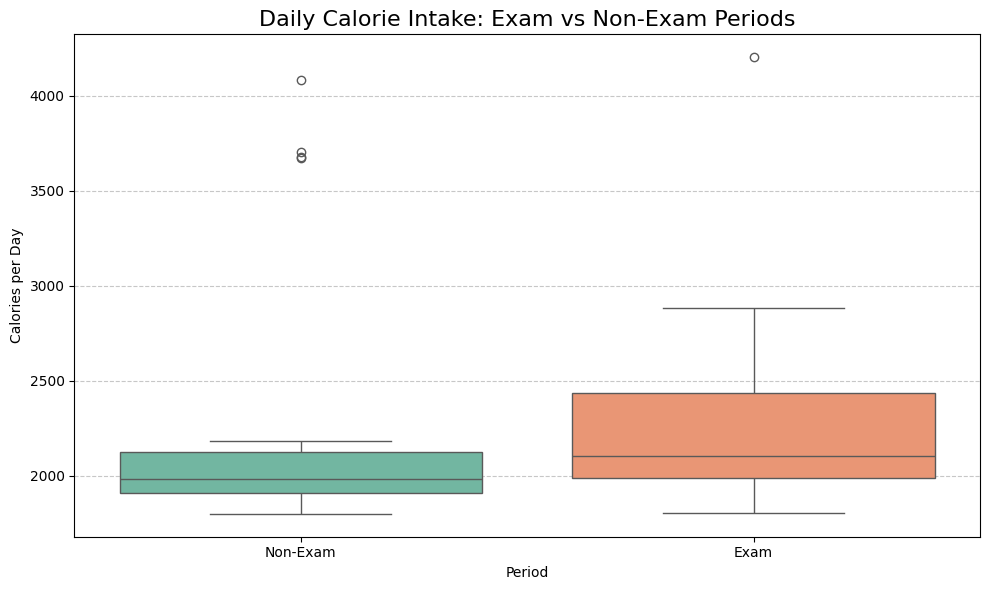

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your eating data
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Assign Period label
eating_df['Period'] = eating_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Group by date and period, then sum total calories per day
daily_calories = eating_df.groupby(['Date', 'Period'])['Calories'].sum().reset_index()

# Plot boxplot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Calories', data=daily_calories, palette='Set2')
plt.title('Daily Calorie Intake: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period')
plt.ylabel('Calories per Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

After that, i created a line graph to visualize the differences in both periods.

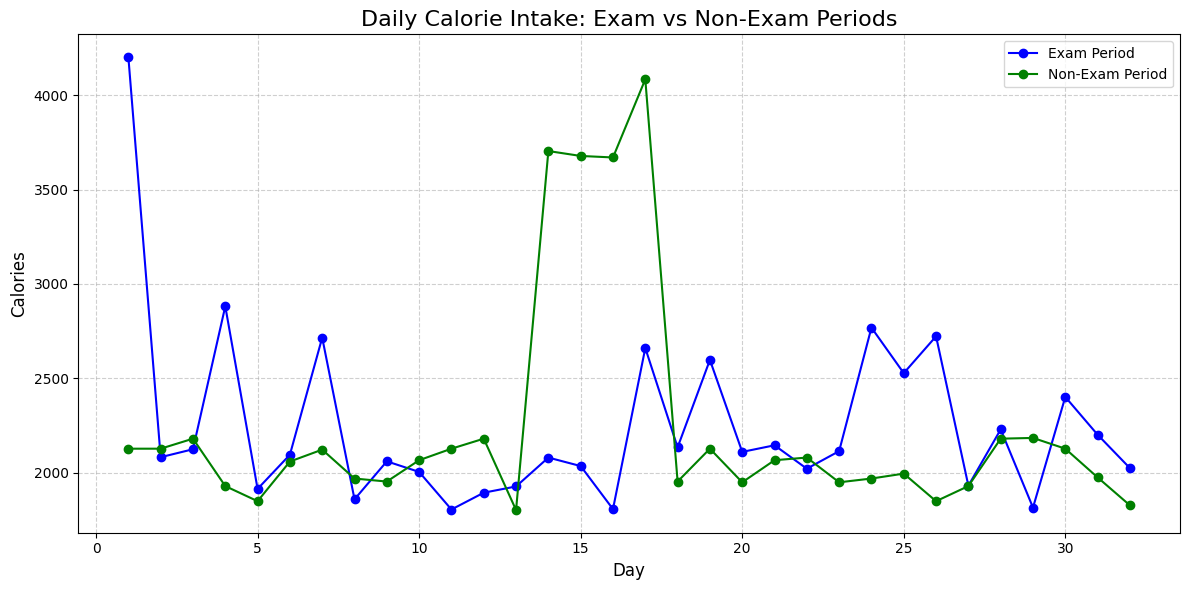

📅 Exam Period: 2025-03-27 → 2025-04-27 (32 days)
📅 Non-Exam Sample: 2025-02-10 → 2025-03-13 (32 days)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load the extended eating data
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Mark periods
eating_df['Period'] = eating_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Match exam period length
exam_day_count = len(eating_df[eating_df['Period'] == 'Exam']['Date'].unique())
non_exam_dates = sorted(eating_df[eating_df['Period'] == 'Non-Exam']['Date'].unique())
latest_start = non_exam_dates[-exam_day_count]
valid_start_dates = [d for d in non_exam_dates if d <= latest_start]
random_start = random.choice(valid_start_dates)
random_end = random_start + pd.Timedelta(days=exam_day_count - 1)

# Assign Adjusted Periods
eating_df['Adjusted Period'] = eating_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if random_start <= x <= random_end else 'Exclude')
)

# Filter relevant data
filtered_df = eating_df[eating_df['Adjusted Period'].isin(['Exam', 'Non-Exam'])]

# Aggregate daily total calories
daily_calories = filtered_df.groupby(['Date', 'Adjusted Period'])['Calories'].sum().reset_index()

# Separate exam and non-exam data
exam_cals = daily_calories[daily_calories['Adjusted Period'] == 'Exam'].sort_values('Date').copy()
non_exam_cals = daily_calories[daily_calories['Adjusted Period'] == 'Non-Exam'].sort_values('Date').copy()

# Create a day index
exam_cals['Day'] = range(1, len(exam_cals) + 1)
non_exam_cals['Day'] = range(1, len(non_exam_cals) + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(exam_cals['Day'], exam_cals['Calories'], marker='o', linestyle='-', color='blue', label='Exam Period')
plt.plot(non_exam_cals['Day'], non_exam_cals['Calories'], marker='o', linestyle='-', color='green', label='Non-Exam Period')
plt.title('Daily Calorie Intake: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Calories', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print range info
print(f"📅 Exam Period: {exam_start} → {exam_end} ({exam_day_count} days)")
print(f"📅 Non-Exam Sample: {random_start} → {random_end} ({exam_day_count} days)")

Then, i created the histogram for compare the distributions of my calorie intake in both periods.

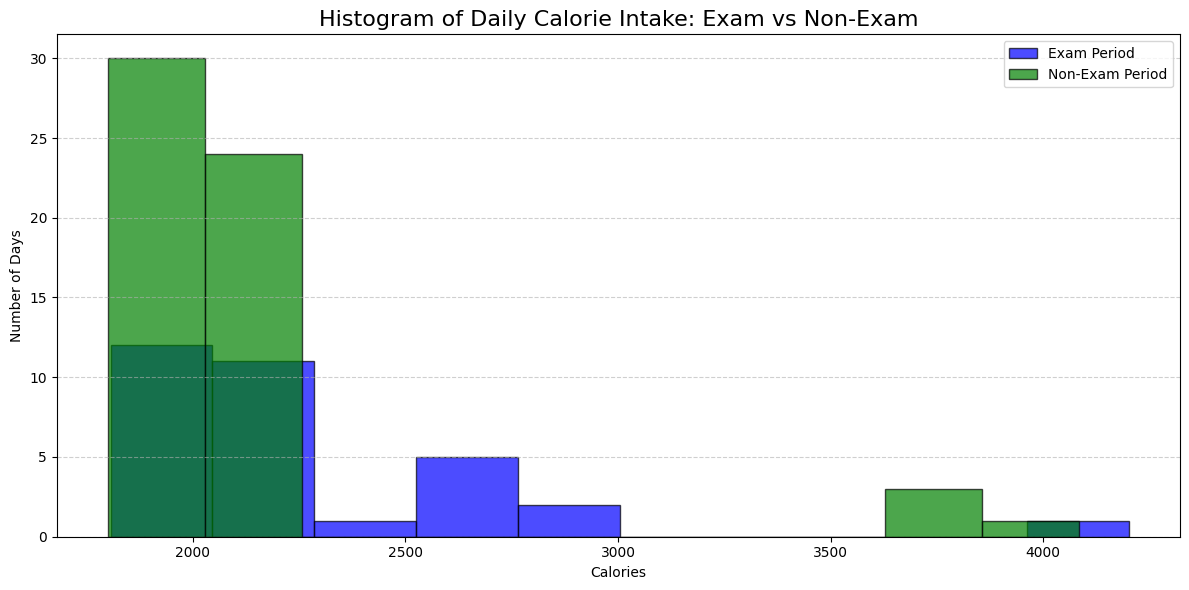

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load eating data
eating_df = pd.read_csv('extended_eating_data_final.csv')
eating_df['Date'] = pd.to_datetime(eating_df['Date']).dt.date

# Define exam period
exam_start = pd.to_datetime('2025-03-27').date()
exam_end = pd.to_datetime('2025-04-27').date()

# Label Exam vs Non-Exam
eating_df['Period'] = eating_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Group by date and sum calories per day
daily_calories = eating_df.groupby(['Date', 'Period'])['Calories'].sum().reset_index()

# Split exam and non-exam data
exam_data = daily_calories[daily_calories['Period'] == 'Exam']
non_exam_data = daily_calories[daily_calories['Period'] == 'Non-Exam']

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(exam_data['Calories'], bins=10, alpha=0.7, label='Exam Period', color='blue', edgecolor='black')
plt.hist(non_exam_data['Calories'], bins=10, alpha=0.7, label='Non-Exam Period', color='green', edgecolor='black')
plt.title('Histogram of Daily Calorie Intake: Exam vs Non-Exam', fontsize=16)
plt.xlabel('Calories')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From now on, ı started the look at my sleep data.I exported the sleep duration and the quality information and did some visualizations from it to understand my behaviour in the exam times versus non exam times.

Firstly,to be a sample, ı create a table and ı seperate the informations as exam period versus non exam period with tabulate method the see a clear version of output.

In [ ]:
import pandas as pd
from tabulate import tabulate

# Load your full sleep dataset
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# Define the exam period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')

# Filter rows for exam and non-exam periods
exam_sleep = sleep_df[(sleep_df['Date'] >= exam_start) & (sleep_df['Date'] <= exam_end)].copy()
non_exam_sleep = sleep_df[sleep_df['Date'] < exam_start].copy()

# Determine sample size based on the smaller group
sample_size = min(len(exam_sleep), len(non_exam_sleep))

# Slice equal-sized samples
exam_sample = exam_sleep.sort_values('Date').head(sample_size)
non_exam_sample = non_exam_sleep.sort_values('Date').tail(sample_size)

# Add labels
exam_sample['Period'] = 'Exam'
non_exam_sample['Period'] = 'Non-Exam'

# Combine for comparison
balanced_df = pd.concat([exam_sample, non_exam_sample]).sort_values(by=['Period', 'Date'])

# Display with tabulate
print(tabulate(balanced_df, headers='keys', tablefmt='grid', showindex=False))

+---------------------+---------------+-----------------+-----------------------+-----------+---------------+----------+
| Date                |   Sleep_Hours | Sleep_Quality   |   Sleep_Interruptions | Bedtime   | Wakeup_Time   | Period   |
+=====================+===============+=================+=======================+===========+===============+==========+
| 2025-03-27 00:00:00 |           7.7 | Good            |                     0 | 23:00     | 06:42         | Exam     |
+---------------------+---------------+-----------------+-----------------------+-----------+---------------+----------+
| 2025-03-27 00:00:00 |           7.8 | Good            |                     0 | 0:00      | 07:48         | Exam     |
+---------------------+---------------+-----------------+-----------------------+-----------+---------------+----------+
| 2025-03-28 00:00:00 |           8   | Good            |                     0 | 0:00      | 08:00         | Exam     |
+---------------------+---------

Then i created the line graph to understand my sleep duration pattern in exam period.

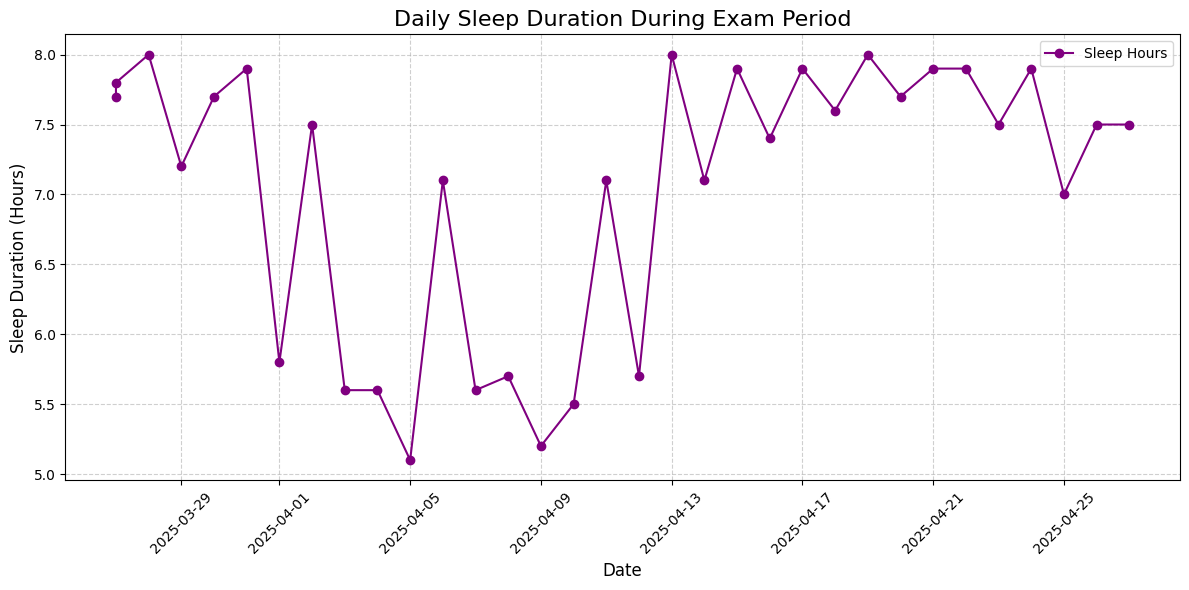

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your sleep data
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# Define exam period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')

# Filter only exam period sleep data
exam_sleep = sleep_df[(sleep_df['Date'] >= exam_start) & (sleep_df['Date'] <= exam_end)].copy()

# Plot sleep hours over the exam period
plt.figure(figsize=(12, 6))
plt.plot(exam_sleep['Date'], exam_sleep['Sleep_Hours'], marker='o', linestyle='-', color='purple', label='Sleep Hours')
plt.title('Daily Sleep Duration During Exam Period', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sleep Duration (Hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Then i created a line graph for both of the periods to compare the sleep duration pattern.

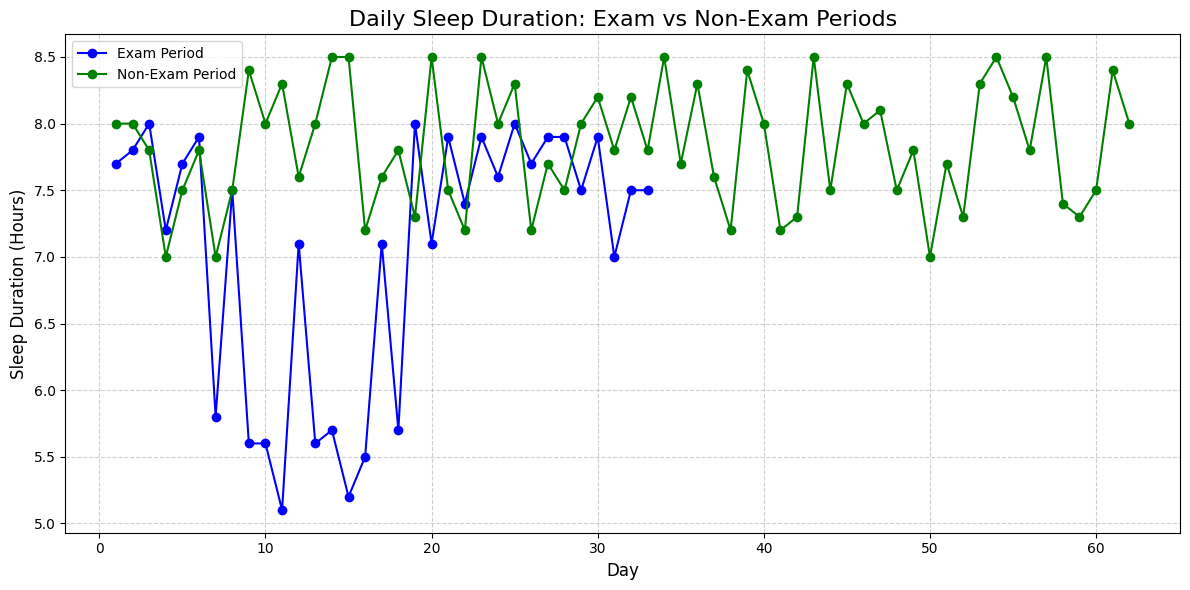

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your sleep dataset
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# Define exam period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')

# Label periods
sleep_df['Period'] = sleep_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Filter only Exam and Non-Exam rows
filtered_sleep = sleep_df[sleep_df['Period'].isin(['Exam', 'Non-Exam'])].copy()

# Separate exam and non-exam data
exam_sleep = filtered_sleep[filtered_sleep['Period'] == 'Exam'].sort_values('Date').copy()
non_exam_sleep = filtered_sleep[filtered_sleep['Period'] == 'Non-Exam'].sort_values('Date').copy()

# Add Day index for clearer plotting
exam_sleep['Day'] = range(1, len(exam_sleep) + 1)
non_exam_sleep['Day'] = range(1, len(non_exam_sleep) + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(exam_sleep['Day'], exam_sleep['Sleep_Hours'], marker='o', linestyle='-', color='blue', label='Exam Period')
plt.plot(non_exam_sleep['Day'], non_exam_sleep['Sleep_Hours'], marker='o', linestyle='-', color='green', label='Non-Exam Period')
plt.title('Daily Sleep Duration: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Sleep Duration (Hours)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

After that, i created a scatter plot to understand the differences in durations even better.

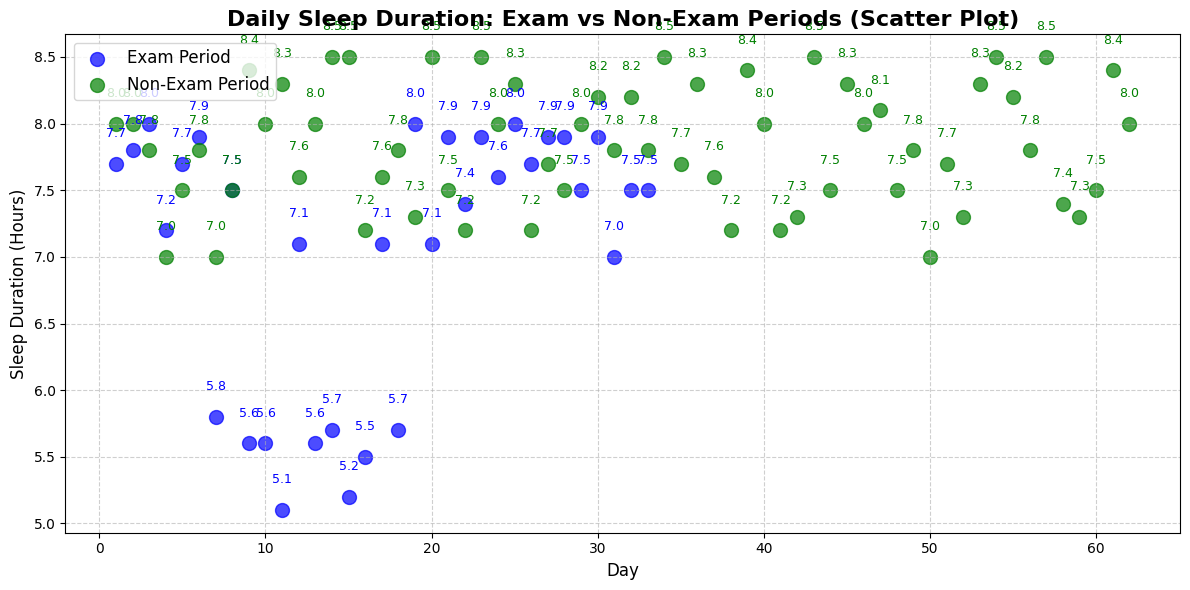

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sleep dataset
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# Define exam period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')

# Assign period labels
sleep_df['Period'] = sleep_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Filter periods
filtered_sleep = sleep_df[sleep_df['Period'].isin(['Exam', 'Non-Exam'])].copy()

# Separate and sort
exam_sleep = filtered_sleep[filtered_sleep['Period'] == 'Exam'].sort_values('Date').copy()
non_exam_sleep = filtered_sleep[filtered_sleep['Period'] == 'Non-Exam'].sort_values('Date').copy()

# Add day index
exam_sleep['Day'] = range(1, len(exam_sleep) + 1)
non_exam_sleep['Day'] = range(1, len(non_exam_sleep) + 1)

# Plot scatter
plt.figure(figsize=(12, 6))
plt.scatter(exam_sleep['Day'], exam_sleep['Sleep_Hours'], color='blue', label='Exam Period', s=100, alpha=0.7)
plt.scatter(non_exam_sleep['Day'], non_exam_sleep['Sleep_Hours'], color='green', label='Non-Exam Period', s=100, alpha=0.7)

# Add plot details
plt.title('Daily Sleep Duration: Exam vs Non-Exam Periods (Scatter Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Sleep Duration (Hours)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Add point annotations
for i in range(len(exam_sleep)):
    plt.text(
        exam_sleep['Day'].iloc[i],
        exam_sleep['Sleep_Hours'].iloc[i] + 0.2,
        f"{exam_sleep['Sleep_Hours'].iloc[i]:.1f}",
        fontsize=9, ha='center', color='blue'
    )
for i in range(len(non_exam_sleep)):
    plt.text(
        non_exam_sleep['Day'].iloc[i],
        non_exam_sleep['Sleep_Hours'].iloc[i] + 0.2,
        f"{non_exam_sleep['Sleep_Hours'].iloc[i]:.1f}",
        fontsize=9, ha='center', color='green'
    )

plt.tight_layout()
plt.show()

Then, i created the boxplot with the Q1,Q3 and Median values.

<ipython-input-42-0a5e77b18989>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Sleep_Hours', data=filtered_sleep, palette='muted', showfliers=False)


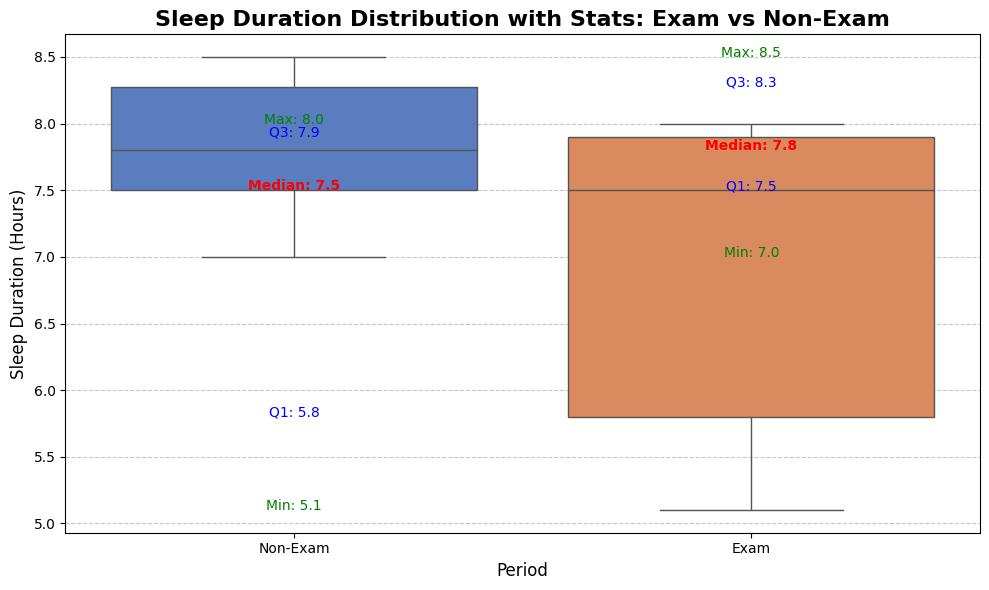

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sleep dataset
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# Define exam period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')

# Label periods
sleep_df['Period'] = sleep_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# Filter only exam and non-exam data
filtered_sleep = sleep_df[sleep_df['Period'].isin(['Exam', 'Non-Exam'])]

# Calculate descriptive stats
stats = filtered_sleep.groupby('Period')['Sleep_Hours'].describe()

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Sleep_Hours', data=filtered_sleep, palette='muted', showfliers=False)

# Annotate boxplot with stats
for i, period in enumerate(['Exam', 'Non-Exam']):
    q1 = stats.loc[period, '25%']
    q3 = stats.loc[period, '75%']
    median = stats.loc[period, '50%']
    min_val = stats.loc[period, 'min']
    max_val = stats.loc[period, 'max']

    plt.text(i, q1, f'Q1: {q1:.1f}', ha='center', color='blue', fontsize=10)
    plt.text(i, q3, f'Q3: {q3:.1f}', ha='center', color='blue', fontsize=10)
    plt.text(i, median, f'Median: {median:.1f}', ha='center', color='red', weight='bold', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.1f}', ha='center', color='green', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.1f}', ha='center', color='green', fontsize=10)

# Final plot adjustments
plt.title('Sleep Duration Distribution with Stats: Exam vs Non-Exam', fontsize=16, fontweight='bold')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Sleep Duration (Hours)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Upload files from your local machine
uploaded = files.upload()

Saving extended_eating_data_final.csv to extended_eating_data_final.csv
Saving extended_sleep_data_final_full.csv to extended_sleep_data_final_full (1).csv


In [ ]:
import os

# Check the files in the current directory
print(os.listdir())


['.config', 'extended_sleep_data_final_full.csv', 'extended_sleep_data_final_full (1).csv', 'extended_eating_data_final.csv', 'sample_data']


I also created a violin plot for an additional visualization graph.

<ipython-input-7-1393c88d8653>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Period', y='Sleep_Hours', data=filtered_sleep, palette='muted', inner=None)
<ipython-input-7-1393c88d8653>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Sleep_Hours', data=filtered_sleep, width=0.2, palette='dark', showfliers=False)


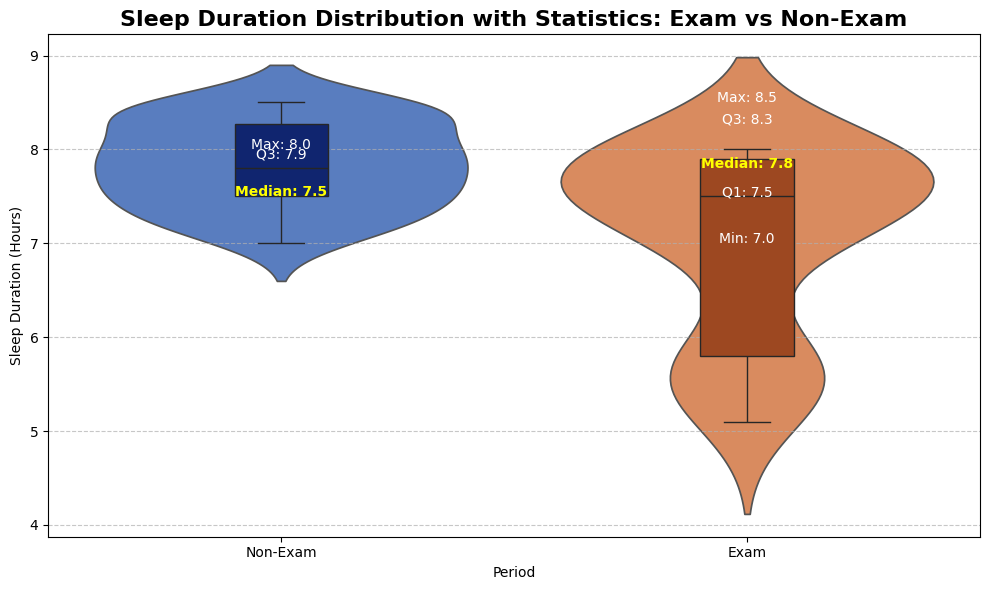

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Load your data
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# STEP 2: Define exam period and label Period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')
sleep_df['Period'] = sleep_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# STEP 3: Filter data for violin/boxplot
filtered_sleep = sleep_df[sleep_df['Period'].isin(['Exam', 'Non-Exam'])]

# STEP 4: Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Period', y='Sleep_Hours', data=filtered_sleep, palette='muted', inner=None)
sns.boxplot(x='Period', y='Sleep_Hours', data=filtered_sleep, width=0.2, palette='dark', showfliers=False)

# STEP 5: Annotate stats
for i, period in enumerate(['Exam', 'Non-Exam']):
    group = filtered_sleep[filtered_sleep['Period'] == period]['Sleep_Hours'].dropna()

    q1 = np.percentile(group, 25)
    q3 = np.percentile(group, 75)
    median = np.percentile(group, 50)
    min_val = group.min()
    max_val = group.max()

    plt.text(i, q1, f'Q1: {q1:.1f}', ha='center', color='white', fontsize=10)
    plt.text(i, q3, f'Q3: {q3:.1f}', ha='center', color='white', fontsize=10)
    plt.text(i, median, f'Median: {median:.1f}', ha='center', color='yellow', weight='bold', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.1f}', ha='center', color='white', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.1f}', ha='center', color='white', fontsize=10)

# STEP 6: Final plot settings
plt.title('Sleep Duration Distribution with Statistics: Exam vs Non-Exam', fontsize=16, fontweight='bold')
plt.xlabel('Period')
plt.ylabel('Sleep Duration (Hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Upload files from your local machine
uploaded = files.upload()

Saving extended_eating_data_final.csv to extended_eating_data_final (1).csv
Saving extended_sleep_data_final_full.csv to extended_sleep_data_final_full (2).csv


In [ ]:
import os

# Check the files in the current directory
print(os.listdir())


['.config', 'extended_sleep_data_final_full.csv', 'extended_sleep_data_final_full (1).csv', 'extended_sleep_data_final_full (2).csv', 'extended_eating_data_final (1).csv', 'extended_eating_data_final.csv', 'sample_data']


Firstly,ı wanted to k-means clustering, in order to do that, ı had to find the optimal k number. Because of that, with elbow method ı found it and then ı did a k-means clustering.

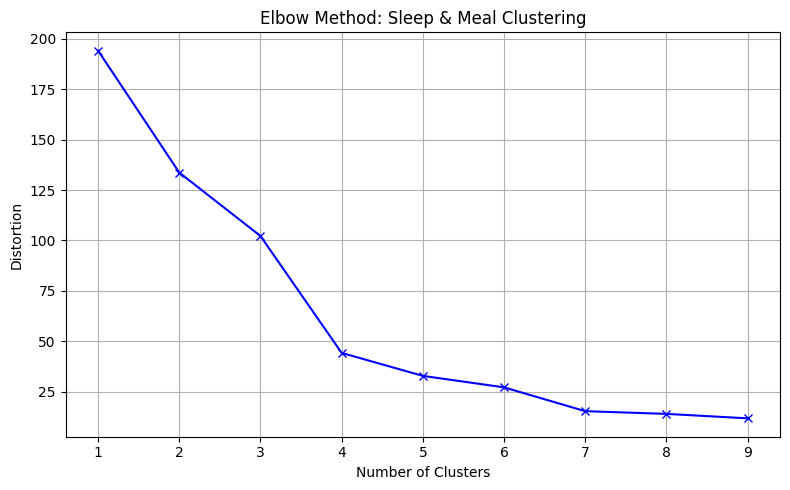

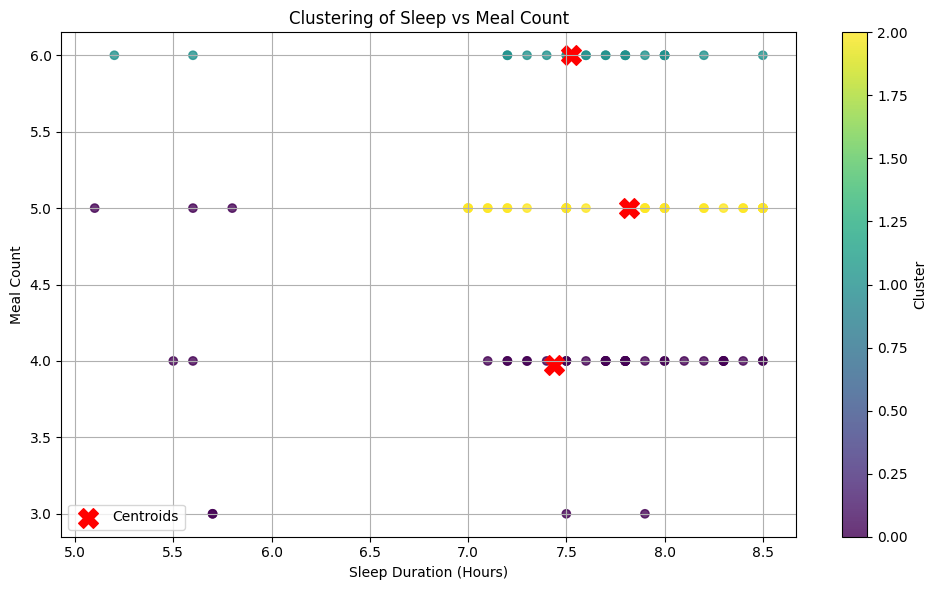

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# STEP 1: Merge on Date
combined_df = pd.merge(
    sleep_df[['Date', 'Sleep_Hours']],
    eating_df[['Date', 'Meal_Count']],
    on='Date',
    how='inner'
)

# STEP 2: Drop missing values
clustering_data = combined_df[['Sleep_Hours', 'Meal_Count']].dropna()

# STEP 3: Standardize
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# STEP 4: Elbow method
distortions = []
K = range(1, min(len(clustering_data), 10))
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method: Sleep & Meal Clustering')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 5: Apply KMeans
optimal_clusters = 3  # Change based on elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# STEP 6: Plot Clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    clustering_data['Sleep_Hours'],
    clustering_data['Meal_Count'],
    c=clustering_data['Cluster'],
    cmap='viridis',
    alpha=0.8
)
plt.title('Clustering of Sleep vs Meal Count')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Meal Count')
plt.colorbar(label='Cluster')

# Plot centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Causal Inference

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# STEP 1: Merge sleep and eating data
df = pd.merge(
    sleep_df[['Date', 'Sleep_Hours']],
    eating_df[['Date', 'Meal_Count']],
    on='Date',
    how='inner'
)

# STEP 2: Define treatment (more than 3 meals = treatment group)
df['Treatment'] = (df['Meal_Count'] > 3).astype(int)

# STEP 3: Independent variable (predictor) for logistic regression
X = df[['Sleep_Hours']]  # can also include more features later
y = df['Treatment']

# STEP 4: Standardize predictor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 5: Logistic regression for propensity scores
logistic_model = LogisticRegression()
logistic_model.fit(X_scaled, y)
df['Propensity_Score'] = logistic_model.predict_proba(X_scaled)[:, 1]

# STEP 6: Separate treated and control groups
treated = df[df['Treatment'] == 1]
control = df[df['Treatment'] == 0]

# STEP 7: Nearest neighbor matching using propensity scores
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['Propensity_Score']])
distances, indices = nn.kneighbors(treated[['Propensity_Score']])

# STEP 8: Combine matched pairs
matched_control = control.iloc[indices.flatten()].copy()
matched_control['Matched'] = 0
treated = treated.copy()
treated['Matched'] = 1

matched_data = pd.concat([treated, matched_control])

# STEP 9: Analyze treatment effect (on Sleep Hours)
treatment_effect = matched_data[matched_data['Matched'] == 1]['Sleep_Hours'].mean() - \
                   matched_data[matched_data['Matched'] == 0]['Sleep_Hours'].mean()

print(f"Average Treatment Effect on Sleep Hours (more than 3 meals vs. not): {treatment_effect:.2f}")

Average Treatment Effect on Sleep Hours (more than 3 meals vs. not): 0.02


The causal inference analysis indicates a positive treatment effect, with an average increase of 0.02 hours in the treatment group (those eating more than 3 meals daily) compared to the matched control group. This suggests that higher food consumption may be associated with increased sleep duration levels, highlighting a potential trade-off between sleep duration and eating habits. But we have to say that, this might not be that significant when we look at the value we get.


After that, i created a heatmap for sleep duration in exam period to keep visualizing.

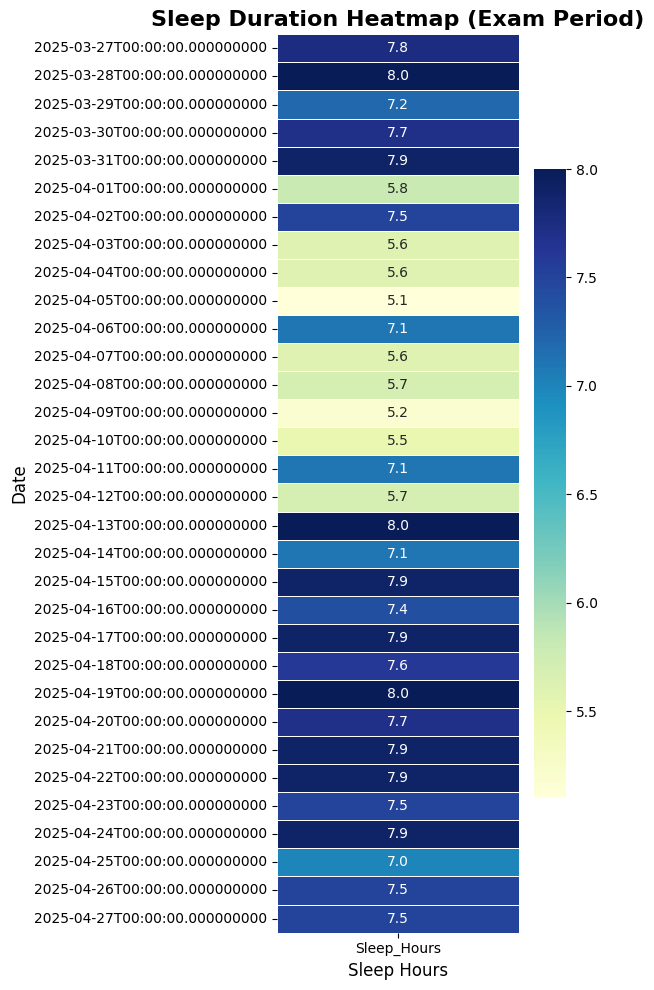

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Ensure 'Date' is datetime
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])

# STEP 2: Define Period column if not already defined
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')
sleep_df['Period'] = sleep_df['Date'].apply(lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam')

# STEP 3: Filter only Exam period
exam_sleep = sleep_df[sleep_df['Period'] == 'Exam']

# STEP 4: Create pivot_table just for Exam
heatmap_data = exam_sleep.pivot_table(index='Date', values='Sleep_Hours', aggfunc='mean')

# STEP 5: Plot heatmap (1 column: Sleep_Hours)
plt.figure(figsize=(6, 10))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={"shrink": 0.7}
)
plt.title('Sleep Duration Heatmap (Exam Period)', fontsize=16, weight='bold')
plt.xlabel('Sleep Hours', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

For addition, another boxplot created by me to compare the attributes of sleep duration for both period.

<ipython-input-21-c48c093ee545>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Sleep_Hours', data=boxplot_data, palette='coolwarm')


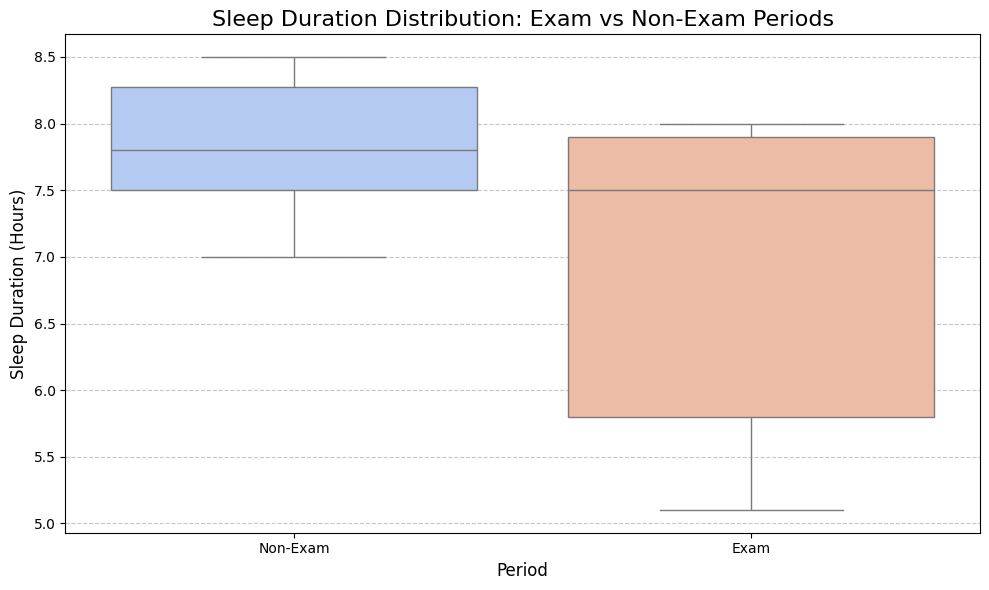

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Filter for Exam and Non-Exam periods
boxplot_data = sleep_df[sleep_df['Period'].isin(['Exam', 'Non-Exam'])]

# STEP 2: Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Sleep_Hours', data=boxplot_data, palette='coolwarm')
plt.title('Sleep Duration Distribution: Exam vs Non-Exam Periods', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Sleep Duration (Hours)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From now on,we are looking at both sleep data and eating data.Firstly, ı begin with the simple scatter plot the see whether there is any correlation between these two coficcients.

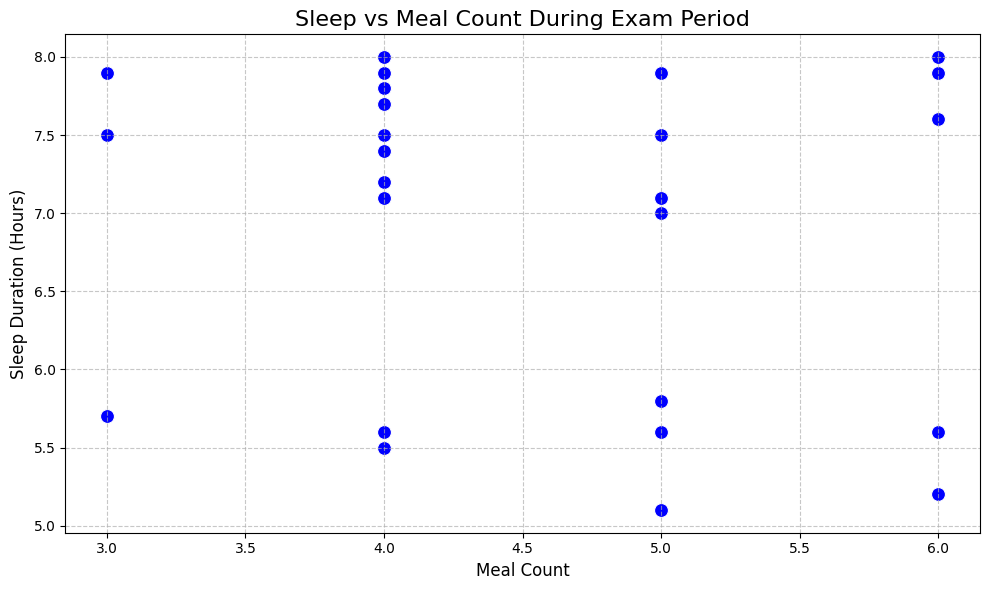

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Merge the datasets on 'Date'
combined_df = pd.merge(
    sleep_df[['Date', 'Sleep_Hours']],
    eating_df[['Date', 'Meal_Count']],
    on='Date',
    how='inner'
)

# STEP 2: Define Exam period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')
combined_df['Period'] = pd.to_datetime(combined_df['Date']).apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)

# STEP 3: Filter only Exam period
exam_data = combined_df[combined_df['Period'] == 'Exam']

# STEP 4: Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Meal_Count', y='Sleep_Hours', data=exam_data, color='blue', s=100)
plt.title('Sleep vs Meal Count During Exam Period', fontsize=16)
plt.xlabel('Meal Count', fontsize=12)
plt.ylabel('Sleep Duration (Hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see here there is no such correlation.

Then I calculate simple correlation statistics.

In [ ]:
from google.colab import files

# Upload files from your local machine
uploaded = files.upload()

Saving extended_eating_data_final.csv to extended_eating_data_final (2).csv
Saving extended_sleep_data_final_full.csv to extended_sleep_data_final_full (2).csv


In [ ]:
import os

# Check the files in the current directory
print(os.listdir())

['.config', 'extended_sleep_data_final_full.csv', 'extended_eating_data_final (2).csv', 'extended_sleep_data_final_full (1).csv', 'extended_sleep_data_final_full (2).csv', 'extended_eating_data_final (1).csv', 'extended_eating_data_final.csv', 'sample_data']


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# STEP 1: Load the datasets using the correct uploaded filenames
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv') # Changed the file path
eating_df = pd.read_csv('extended_eating_data_final.csv') # Changed the file path

# STEP 2: Convert 'Date' columns to datetime
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])
eating_df['Date'] = pd.to_datetime(eating_df['Date'])

# STEP 3: Merge the datasets on 'Date'
combined_df = pd.merge(
    sleep_df[['Date', 'Sleep_Hours']],
    eating_df[['Date', 'Meal_Count']],
    on='Date',
    how='inner'
)

# STEP 4: Define the 'Exam' period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')
combined_df['Period'] = combined_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)

# STEP 5: Filter for only the Exam period
exam_data = combined_df[combined_df['Period'] == 'Exam']

# STEP 6: Group by Date to average daily values
daily_exam = exam_data.groupby('Date')[['Sleep_Hours', 'Meal_Count']].mean().reset_index()

# STEP 7: Calculate Pearson correlation
corr, p_value = pearsonr(daily_exam['Meal_Count'], daily_exam['Sleep_Hours'])

# STEP 8: Print the result
print("==== Pearson Correlation (Exam Period) ====")
print(f"Korelasyon Katsayısı (r): {corr:.3f}")
print(f"P-değeri: {p_value:.4f}")

==== Pearson Correlation (Exam Period) ====
Korelasyon Katsayısı (r): -0.044
P-değeri: 0.8099


Then I did similar scatterplot with trendline.

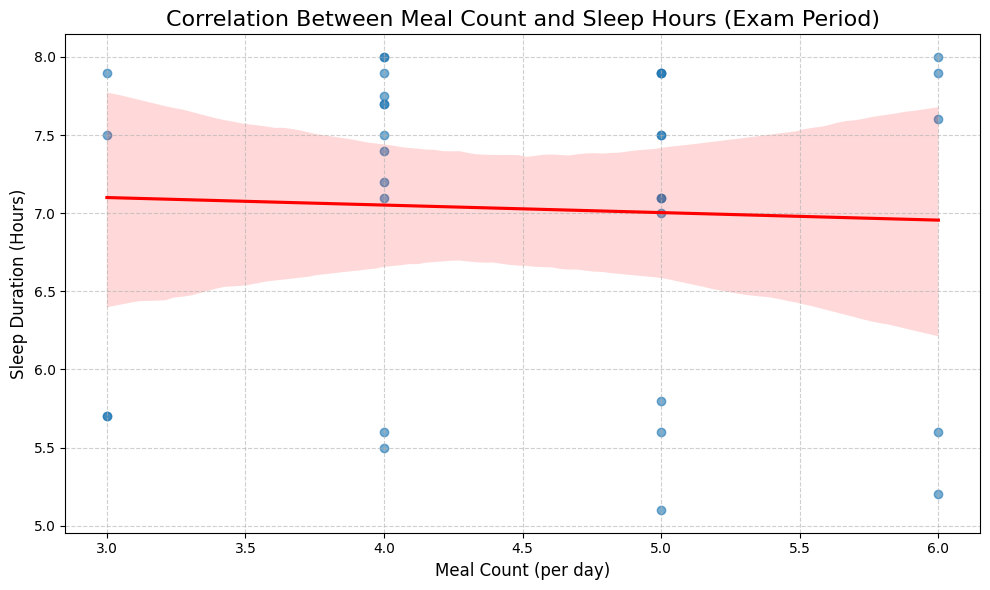

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Load your datasets (if not already loaded)
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')  # Corrected file path
eating_df = pd.read_csv('extended_eating_data_final.csv')  # Corrected file path

# STEP 2: Convert 'Date' to datetime
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])
eating_df['Date'] = pd.to_datetime(eating_df['Date'])

# STEP 3: Merge on 'Date'
combined_df = pd.merge(
    sleep_df[['Date', 'Sleep_Hours']],
    eating_df[['Date', 'Meal_Count']],
    on='Date',
    how='inner'
)

# STEP 4: Mark Exam period
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')
combined_df['Period'] = combined_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)

# STEP 5: Filter and group Exam data
exam_data = combined_df[combined_df['Period'] == 'Exam']
daily_exam = exam_data.groupby('Date')[['Sleep_Hours', 'Meal_Count']].mean().reset_index()

# STEP 6: Scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Meal_Count',
    y='Sleep_Hours',
    data=daily_exam,
    scatter_kws={'alpha': 0.6},
    line_kws={"color": "red"}
)
plt.title('Correlation Between Meal Count and Sleep Hours (Exam Period)', fontsize=16)
plt.xlabel('Meal Count (per day)', fontsize=12)
plt.ylabel('Sleep Duration (Hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Then I wanted to look at some descriptive statsitics and correlation heatmap.

=== Descriptive Statistics: Sleep Hours ===
       Exam Period  Non-Exam Period
count    35.000000        62.000000
mean      7.088571         7.862903
std       0.973403         0.453125
min       5.100000         7.000000
25%       6.400000         7.500000
50%       7.500000         7.800000
75%       7.850000         8.300000
max       8.000000         8.500000


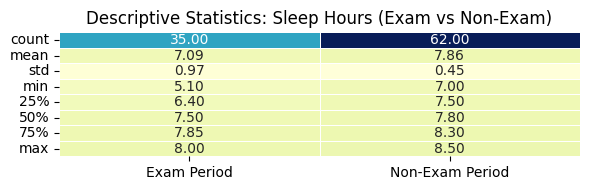


=== Correlation Between Meal Count and Sleep Hours ===
             Meal_Count  Sleep_Hours
Meal_Count     1.000000     0.049129
Sleep_Hours    0.049129     1.000000


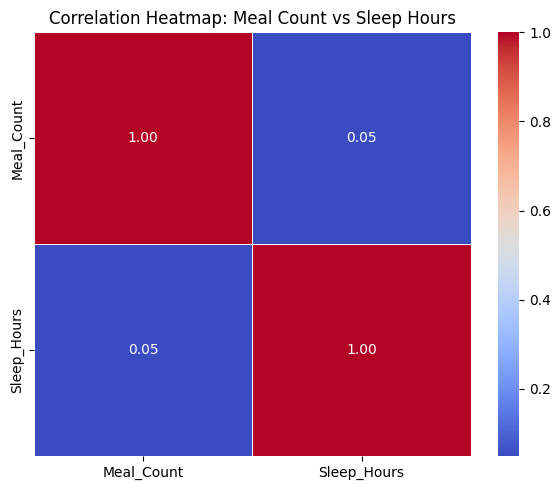

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load the files (if not already loaded)
# Updated to use files from the current directory
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')
eating_df = pd.read_csv('extended_eating_data_final.csv')

# STEP 2: Convert 'Date' to datetime
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])
eating_df['Date'] = pd.to_datetime(eating_df['Date'])

# STEP 3: Merge on 'Date'
combined_df = pd.merge(
    sleep_df[['Date', 'Sleep_Hours']],
    eating_df[['Date', 'Meal_Count']],
    on='Date',
    how='inner'
)

# STEP 4: Add Exam vs Non-Exam period labels
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')
combined_df['Period'] = combined_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else 'Non-Exam'
)

# STEP 5: Descriptive statistics
exam_stats = combined_df[combined_df['Period'] == 'Exam']['Sleep_Hours'].describe()
non_exam_stats = combined_df[combined_df['Period'] == 'Non-Exam']['Sleep_Hours'].describe()

desc_stats_df = pd.DataFrame({
    'Exam Period': exam_stats,
    'Non-Exam Period': non_exam_stats
})
print("=== Descriptive Statistics: Sleep Hours ===")
print(desc_stats_df)

# STEP 6: Plot descriptive stats as a table
plt.figure(figsize=(6, 2))
sns.heatmap(desc_stats_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, linewidths=0.5)
plt.title('Descriptive Statistics: Sleep Hours (Exam vs Non-Exam)', fontsize=12)
plt.tight_layout()
plt.show()

# STEP 7: Daily averages for correlation
daily_data = combined_df.groupby('Date')[['Sleep_Hours', 'Meal_Count']].mean().reset_index()

# STEP 8: Correlation matrix
correlation = daily_data[['Meal_Count', 'Sleep_Hours']].corr()
print("\n=== Correlation Between Meal Count and Sleep Hours ===")
print(correlation)

# STEP 9: Correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Meal Count vs Sleep Hours', fontsize=12)
plt.tight_layout()
plt.show()

Then finally, maybe the most important part for accepting any correlation or causation for some kind of events.I wanted to use "Hypothesis Testing".

First, i sperate the exam and non-exam period in the data and exclude all other unnecessary parts.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# STEP 1: Load your datasets using the correct uploaded filenames
sleep_df = pd.read_csv('extended_sleep_data_final_full.csv')  # Corrected file path
eating_df = pd.read_csv('extended_eating_data_final.csv')  # Corrected file path

# STEP 2: Convert 'Date' columns to datetime
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])
eating_df['Date'] = pd.to_datetime(eating_df['Date'])

# STEP 3: Merge datasets on Date
combined_df = pd.merge(
    sleep_df[['Date', 'Sleep_Hours']],
    eating_df[['Date', 'Meal_Count']],
    on='Date',
    how='inner'
)

# STEP 4: Define exam and non-exam dates
exam_start = pd.to_datetime('2025-03-27')
exam_end = pd.to_datetime('2025-04-27')
three_months_ago = combined_df['Date'].max() - pd.Timedelta(days=90)

# STEP 5: Label periods
combined_df['Period'] = combined_df['Date'].apply(
    lambda x: 'Exam' if exam_start <= x <= exam_end else
              ('Non-Exam' if x >= three_months_ago else 'Exclude')
)

# STEP 6: Check the number of points for each period
print("==== Period Value Counts ====")
print(combined_df['Period'].value_counts())

# STEP 7: Show dates used in each period
exam_dates = combined_df[combined_df['Period'] == 'Exam']['Date']
non_exam_dates = combined_df[combined_df['Period'] == 'Non-Exam']['Date']

print("\nExam Period Dates:")
print(sorted(exam_dates.dt.strftime('%Y-%m-%d').unique()))

print("\nNon-Exam Period Dates:")
print(sorted(non_exam_dates.dt.strftime('%Y-%m-%d').unique()))

==== Period Value Counts ====
Period
Non-Exam    62
Exam        35
Name: count, dtype: int64

Exam Period Dates:
['2025-03-27', '2025-03-28', '2025-03-29', '2025-03-30', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-05', '2025-04-06', '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-12', '2025-04-13', '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18', '2025-04-19', '2025-04-20', '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25', '2025-04-26', '2025-04-27']

Non-Exam Period Dates:
['2025-01-28', '2025-01-29', '2025-01-30', '2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03', '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-08', '2025-02-09', '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15', '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23', '2025-02-24', '2025-02-25', '2025-0

But first ı should determine my hypothesis for these test.

Null Hypothesis(h0)=There is no significant difference in the average sleep duration between the Exam and Non-Exam periods. Alternative Hypothesis(hA)=There is a significant difference in the average sleep duration between the Exam and Non-Exam periods.

Now ı can calculate the values as follows:

In [ ]:
from scipy.stats import ttest_ind

# STEP 1: Filter Sleep Hours for Exam and Non-Exam periods
exam_sleep = combined_df[combined_df['Period'] == 'Exam']['Sleep_Hours']
non_exam_sleep = combined_df[combined_df['Period'] == 'Non-Exam']['Sleep_Hours']

# STEP 2: Perform independent samples t-test
t_stat, p_value = ttest_ind(exam_sleep, non_exam_sleep, equal_var=False)

# STEP 3: Output results
print("==== T-Test: Sleep Hours (Exam vs Non-Exam) ====")
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.4f}")

# STEP 4: Hypothesis test evaluation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: There is a significant difference.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference.")

==== T-Test: Sleep Hours (Exam vs Non-Exam) ====
T-Statistic: -4.442
P-Value: 0.0001
✅ Reject the null hypothesis: There is a significant difference.


From these values, we reject null hypothesis because our p-value is less than 0.05

There is statistically significant difference in sleep duration between Exam and Non-Exam periods. This means that based on the data, we can conclude that the average sleep duration differs during these two period.